Bike Rental Regression Analysis

STEP 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


STEP 2: Load Dataset

In [2]:
df = pd.read_csv("Bike_Rental_data(in).csv")
df.head()


C:\Users\vijay\AppData\Local\Temp\ipykernel_17864\1733732452.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Bike_Rental_data(in).csv")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,1/1/2011,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,1/1/2011,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,1/1/2011,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,?,0,5,27,32.004786
3,3.993251,1/1/2011,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,1/1/2011,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


STEP 3: Handle Date Column

In [3]:
df['dteday'] = pd.to_datetime(
    df['dteday'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year

df.drop(columns=['dteday'], inplace=True)



STEP 4: Correlation Analysis

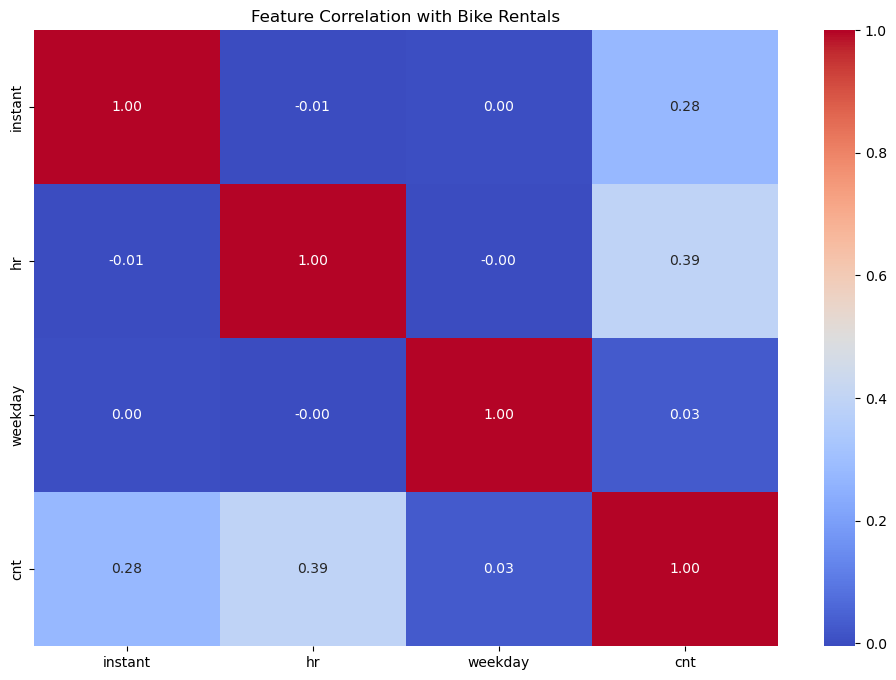

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Bike Rentals")
plt.show()



STEP 5: Check Distribution of Numerical Data

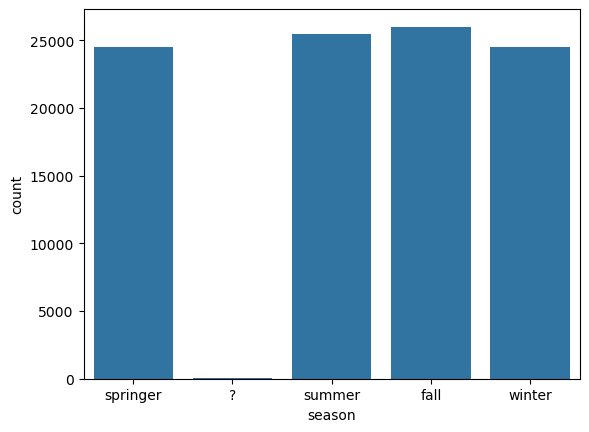

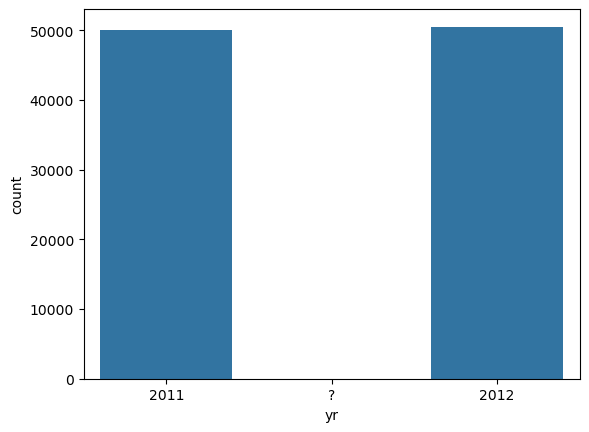

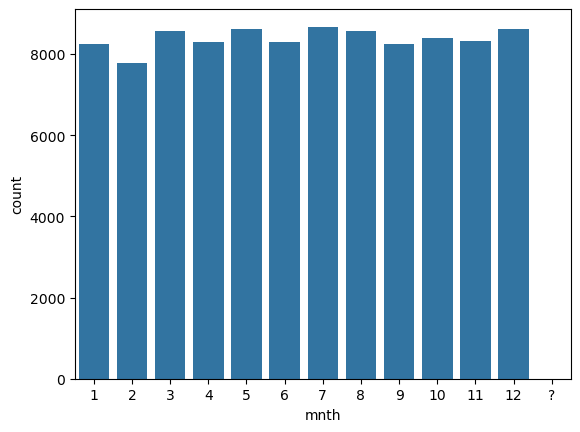

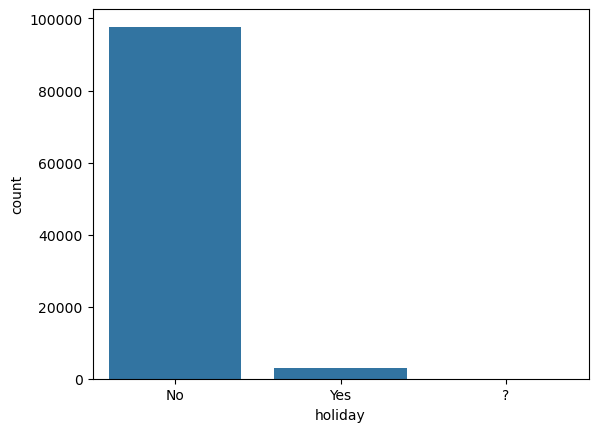

In [5]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

STEP 7: Correlation Matrix Heatmap

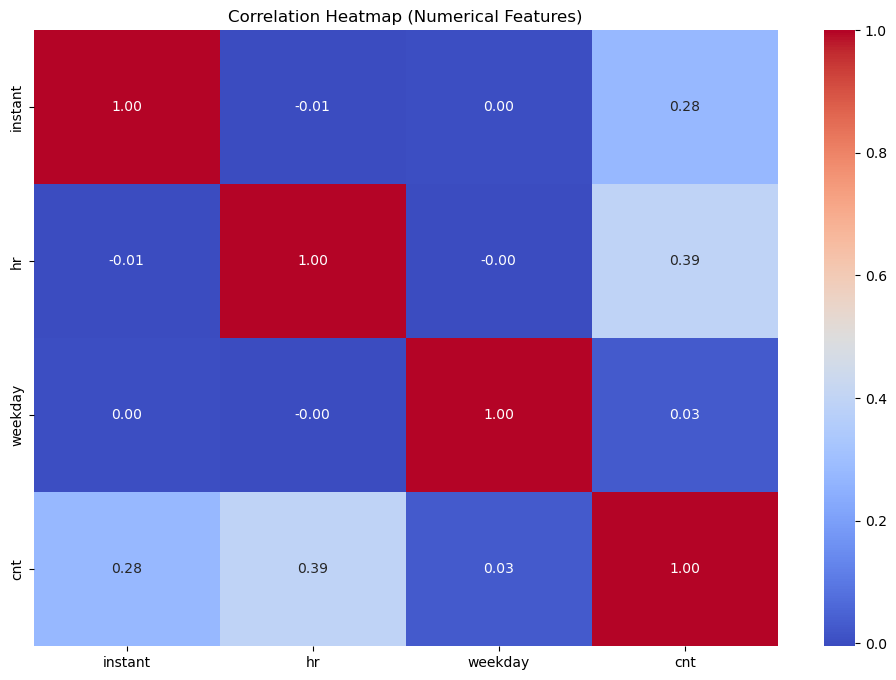

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


STEP 8: Hypothesis Testing

In [13]:
# Hypothesis Testing using Pearson Correlation (Bike Rental Dataset)

from scipy.stats import pearsonr



# Select variables
X = 'temp'   # Independent variable
y = 'cnt'    # Dependent variable

# Convert to numeric (important step)
df[X] = pd.to_numeric(df[X], errors='coerce')
df[y] = pd.to_numeric(df[y], errors='coerce')

# Remove missing values
data = df[[X, y]].dropna()

# Hypotheses:
# H0: There is NO linear relationship between temperature and bike rentals
# H1: There IS a linear relationship between temperature and bike rentals

# Pearson Correlation Test
correlation, p_value = pearsonr(data[X], data[y])

# Significance level
alpha = 0.05

# Print results
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

if p_value < alpha:
    print("Decision: Reject the Null Hypothesis (H0)")
else:
    print("Decision: Fail to Reject the Null Hypothesis (H0)")




Pearson Correlation Coefficient: 0.4062120051741501
P-value: 0.0
Decision: Reject the Null Hypothesis (H0)


p-value < 0.05 → temperature significantly affects rentals

Reject null hypothesis

STEP 9: Encoding

In [14]:
df.dtypes

instant       float64
dteday         object
season         object
yr             object
mnth           object
hr            float64
holiday        object
weekday       float64
workingday     object
weathersit     object
temp          float64
atemp          object
hum            object
windspeed      object
casual         object
registered     object
cnt           float64
dtype: object

STEP 10: Feature Scaling (Standardization)

In [16]:
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['cnt'])
y = df['cnt']

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed successfully")

Feature scaling completed successfully


STEP 11: Train–Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Prepare Evaluation Function

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2


Simple Linear Regression

from sklearn.linear_model import LinearRegression

X_simple = df[['temp']]
y = df['cnt']

X_tr, X_te, y_tr, y_te = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_tr, y_tr)

y_pred_simple = lr_simple.predict(X_te)

mse, rmse, mae, r2 = evaluate_model(y_te, y_pred_simple)
mse, rmse, mae, r2


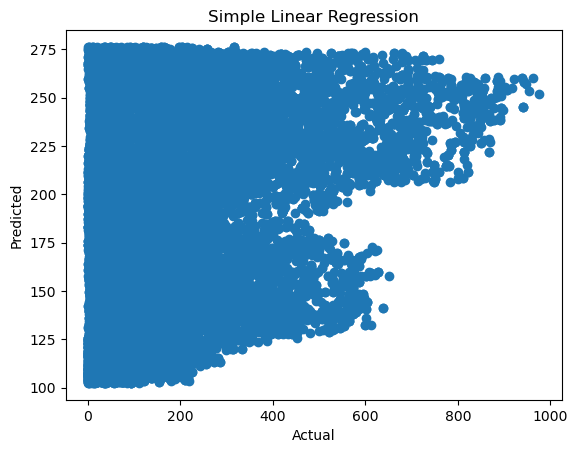

In [22]:
simple_lr = LinearRegression()
simple_lr.fit(X_train[:, [0]], y_train)  # Using only 'temp'
y_pred_simple = simple_lr.predict(X_test[:, [0]])
y_pred_simple = simple_lr.predict(X_test[:, [0]])
plt.scatter(y_test, y_pred_simple)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Simple Linear Regression")
plt.show()

### Simple Linear Regression Insights
- Uses only one feature (temperature)
- High error values indicate underfitting
- Cannot capture complex relationships
- Suitable only for basic trend understanding


Multiple Linear Regression

In [39]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)
evaluate_model(y_test, y_pred_mlr)
mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_mlr)
r2 = r2_score(y_test, y_pred_mlr)
mse, rmse, mae, r2



(25311.569180304592,
 np.float64(159.0961004559967),
 118.33367536907258,
 0.2311332486223332)

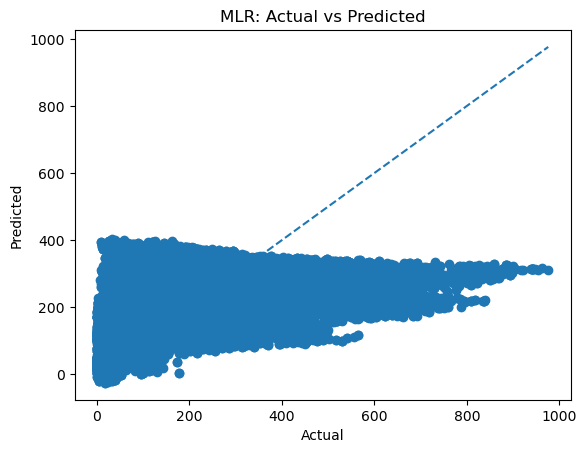

In [40]:
plt.scatter(y_test, y_pred_mlr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.title("MLR: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


### Multiple Linear Regression Insights
- Uses all features simultaneously
- Error values decrease compared to simple linear regression
- Sensitive to multicollinearity
- Good baseline multivariate model


Polynomial Regression (Degree = 2)

In [36]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
evaluate_model(y_test, y_pred_poly)


(19974.63978955314,
 np.float64(141.33166591232532),
 107.60028742403821,
 0.39324834839228273)

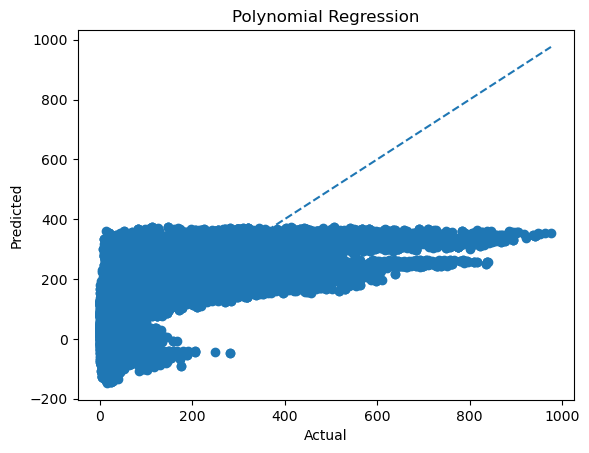

In [37]:
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.title("Polynomial Regression")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


### Polynomial Regression Insights
- Captures non-linear relationships
- Lower error values than linear models
- Risk of overfitting if degree increases
- Needs regularization for stability


Ridge Regression

In [41]:
from sklearn.linear_model import RidgeCV

alphas = np.arange(0.1, 10, 0.05)

ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_ridge)
ridge.alpha_, mse, rmse, mae, r2


(np.float64(9.950000000000003),
 25311.553784356787,
 np.float64(159.0960520703037),
 118.33432336195942,
 0.23113371629118018)

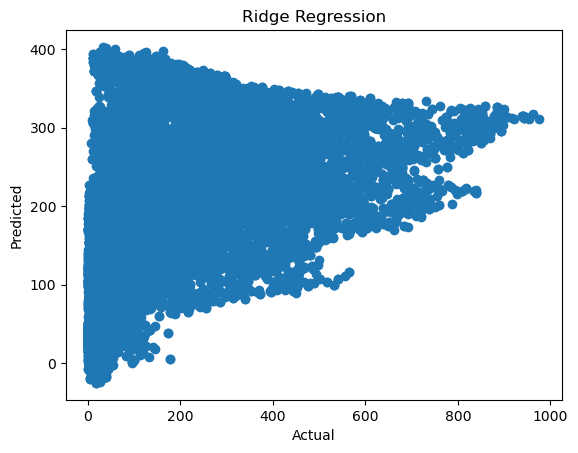

In [42]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression")
plt.show()


### Ridge Regression Insights
- Uses L2 regularization
- Reduces multicollinearity impact
- Balanced bias-variance tradeoff
- Best generalization performance


Lasso Regression

In [43]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=alphas, max_iter=5000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse, rmse, mae, r2 = evaluate_model(y_test, y_pred_lasso)
lasso.alpha_, mse, rmse, mae, r2


(np.float64(0.1),
 25311.42019819191,
 np.float64(159.09563224108922),
 118.34014699801924,
 0.23113777411785563)

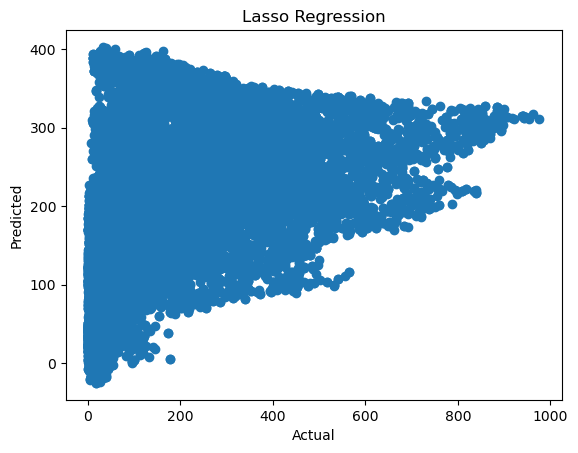

In [44]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression")
plt.show()


### Lasso Regression Insights
- Uses L1 regularization
- Performs automatic feature selection
- Some coefficients become zero
- Useful for reducing model complexity


## Model Comparison Summary

- Simple Linear Regression has highest error due to limited features
- Multiple Linear Regression improves prediction accuracy
- Polynomial Regression captures non-linearity but may overfit
- Ridge Regression provides best balance and stability
- Lasso Regression simplifies the model via feature selection

### Best Model:
**Ridge Regression** — lowest RMSE and best generalization
